In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [2]:
asset_prices = pd.read_csv('HW1_asset_prices.csv')
asset_prices.sample(5)

Date  EOD~BND.11  EOD~DBC.11  EOD~DIA.11  EOD~EEM.11  EOD~EFA.11  \
880  2014-05-14   74.989310       26.40  152.856050   39.947717   61.724662   
849  2014-06-27   75.280989       26.74  155.446474   40.799163   62.937233   
976  2013-12-24   72.578534       25.74  149.235149   38.304239   59.233734   
597  2015-06-29   76.600070       17.62  166.260028   37.537869   60.277377   
207  2017-01-13   79.391901       15.89  195.218891   36.508948   58.633057   

     EOD~EMB.11  EOD~EPP.11  EOD~EWG.11  EOD~EWI.11  ...  EOD~VGK.11  \
880   96.991947   43.195616   28.503476   31.140268  ...   53.942109   
849   98.606756   43.751543   28.701549   32.055173  ...   54.274800   
976   91.007345   40.274406   28.152026   27.799272  ...   50.717932   
597   97.651312   39.621804   26.290911   28.092252  ...   50.725227   
207  107.890096   41.291819   26.602061   24.110820  ...   47.894291   

     EOD~VPL.11  EOD~VXX.11  EOD~XLB.11  EOD~XLE.11  EOD~XLF.11  EOD~XLK.11  \
880   54.871887      592.48   45.119660   86.005826   16.766523   34.455440   
849   57.403853      461.76   46.317874   91.235321   17.437593   36.191062   
976   54.744138      674.56   42.368369   78.827296   16.537463   33.230911   
597   57.410739      324.96   46.044368   69.773084   18.935573   39.754291   
207   60.079624       85.80   50.205227   72.486504   23.239701   49.096319   

     EOD~XLU.11  EOD~CSJ.11  EOD~FXF.11  
880   37.416942  100.905996    109.9200  
849   39.286559  100.911897    109.7000  
976   33.282959  100.116346    109.2964  
597   38.504855  101.636570    104.9600  
207   47.399558  103.591044     94.5900  

[5 rows x 40 columns]

### Solution 2.a
The data is of 39 different stocks end of day prices. The first step is to calculate the correlation between the stocks.

In [3]:
# Cleaning the column names a bit to just the stock index
asset_prices.columns = asset_prices.columns.str.replace('EOD~', '').str.replace('.11', "")

# Calculating the correlation matrix
asset_corr = asset_prices.corr()
asset_corr

BND       DBC       DIA       EEM       EFA       EMB       EPP  \
BND  1.000000 -0.822062  0.794479  0.069905  0.114368  0.912854  0.119582   
DBC -0.822062  1.000000 -0.574282  0.349666  0.200079 -0.600426  0.325952   
DIA  0.794479 -0.574282  1.000000  0.468724  0.563945  0.917934  0.519725   
EEM  0.069905  0.349666  0.468724  1.000000  0.906563  0.383581  0.968244   
EFA  0.114368  0.200079  0.563945  0.906563  1.000000  0.412868  0.881808   
EMB  0.912854 -0.600426  0.917934  0.383581  0.412868  1.000000  0.449375   
EPP  0.119582  0.325952  0.519725  0.968244  0.881808  0.449375  1.000000   
EWG  0.099310  0.228763  0.568437  0.871560  0.961832  0.408301  0.859786   
EWI -0.482615  0.600429 -0.070294  0.609441  0.722791 -0.245520  0.533985   
EWJ  0.638039 -0.472528  0.897045  0.553773  0.701312  0.785165  0.559117   
EWQ  0.133298  0.180010  0.579963  0.830074  0.959346  0.431202  0.813360   
EWU -0.517597  0.742558 -0.122190  0.731485  0.728727 -0.246228  0.672423   
FXB -0.881718  0.785573 -0.815277 -0.010376 -0.047338 -0.858135 -0.098489   
FXC -0.764207  0.959362 -0.539431  0.409094  0.227213 -0.564192  0.358177   
FXE -0.751606  0.934234 -0.555548  0.300953  0.178322 -0.563021  0.258460   
FXI  0.297078 -0.145443  0.540373  0.714284  0.708423  0.410806  0.639610   
FXY -0.215348  0.587160 -0.254213  0.199016  0.014197 -0.050179  0.253768   
GDX  0.235482  0.260990  0.208053  0.412808  0.224695  0.397513  0.504812   
GLD  0.082024  0.397393  0.056570  0.440848  0.253518  0.230380  0.490394   
IEF  0.960502 -0.887364  0.616693 -0.161149 -0.115984  0.772624 -0.123896   
IYR  0.955606 -0.765263  0.856419  0.192315  0.242269  0.915085  0.257621   
JNK  0.445421 -0.022564  0.778771  0.820003  0.808507  0.732292  0.866058   
LQD  0.971305 -0.694091  0.866714  0.266759  0.286353  0.964510  0.323333   
SLV -0.354167  0.724506 -0.256180  0.371996  0.187288 -0.141498  0.416171   
SPY  0.842149 -0.641248  0.991233  0.415816  0.517151  0.935603  0.467515   
TIP  0.859502 -0.457060  0.753160  0.390606  0.312750  0.916770  0.470817   
TLT  0.936742 -0.849735  0.571482 -0.136222 -0.123104  0.731014 -0.105875   
USO -0.867886  0.986548 -0.664995  0.266093  0.123862 -0.682872  0.227297   
UUP  0.675114 -0.898963  0.518790 -0.313187 -0.187701  0.489625 -0.273305   
VGK -0.037230  0.333239  0.412195  0.872187  0.975473  0.257371  0.831654   
VPL  0.536324 -0.215966  0.875397  0.788827  0.852729  0.776831  0.806764   
VXX -0.900317  0.773717 -0.883305 -0.162012 -0.274274 -0.917891 -0.229427   
XLB  0.597031 -0.238640  0.898652  0.743330  0.759922  0.815172  0.790734   
XLE -0.613705  0.895370 -0.346392  0.522937  0.333035 -0.346823  0.529161   
XLF  0.689425 -0.509694  0.975872  0.488016  0.596364  0.842485  0.540090   
XLK  0.845532 -0.644009  0.988677  0.403966  0.504831  0.939693  0.449015   
XLU  0.941027 -0.717165  0.910599  0.239615  0.291689  0.947970  0.305822   
CSJ  0.934951 -0.713552  0.917660  0.227668  0.308123  0.968140  0.293515   
FXF -0.769985  0.870505 -0.657030  0.224999  0.135446 -0.655235  0.170135   

          EWG       EWI       EWJ  ...       VGK       VPL       VXX  \
BND  0.099310 -0.482615  0.638039  ... -0.037230  0.536324 -0.900317   
DBC  0.228763  0.600429 -0.472528  ...  0.333239 -0.215966  0.773717   
DIA  0.568437 -0.070294  0.897045  ...  0.412195  0.875397 -0.883305   
EEM  0.871560  0.609441  0.553773  ...  0.872187  0.788827 -0.162012   
EFA  0.961832  0.722791  0.701312  ...  0.975473  0.852729 -0.274274   
EMB  0.408301 -0.245520  0.785165  ...  0.257371  0.776831 -0.917891   
EPP  0.859786  0.533985  0.559117  ...  0.831654  0.806764 -0.229427   
EWG  1.000000  0.670526  0.664514  ...  0.943557  0.830771 -0.232118   
EWI  0.670526  1.000000  0.120915  ...  0.834734  0.285055  0.339941   
EWJ  0.664514  0.120915  1.000000  ...  0.548281  0.933750 -0.799630   
EWQ  0.964138  0.715726  0.656312  ...  0.957204  0.814066 -0.266488   
EWU  0.673132  0.896797  0.075002  ...  0.821343  0.299800  0.386

The same information can be displayed as an edgelist as follows

In [4]:
asset_corr_el = asset_corr.stack().reset_index()
asset_corr_el.columns = ['level_0', 'level_1', 'value']
asset_corr_el

level_0 level_1     value
0        BND     BND  1.000000
1        BND     DBC -0.822062
2        BND     DIA  0.794479
3        BND     EEM  0.069905
4        BND     EFA  0.114368
5        BND     EMB  0.912854
6        BND     EPP  0.119582
7        BND     EWG  0.099310
8        BND     EWI -0.482615
9        BND     EWJ  0.638039
10       BND     EWQ  0.133298
11       BND     EWU -0.517597
12       BND     FXB -0.881718
13       BND     FXC -0.764207
14       BND     FXE -0.751606
15       BND     FXI  0.297078
16       BND     FXY -0.215348
17       BND     GDX  0.235482
18       BND     GLD  0.082024
19       BND     IEF  0.960502
20       BND     IYR  0.955606
21       BND     JNK  0.445421
22       BND     LQD  0.971305
23       BND     SLV -0.354167
24       BND     SPY  0.842149
25       BND     TIP  0.859502
26       BND     TLT  0.936742
27       BND     USO -0.867886
28       BND     UUP  0.675114
29       BND     VGK -0.037230
...      ...     ...       ...
1491     FXF     EWJ -0.522373
1492     FXF     EWQ  0.126692
1493     FXF     EWU  0.690239
1494     FXF     FXB  0.838066
1495     FXF     FXC  0.858121
1496     FXF     FXE  0.876336
1497     FXF     FXI -0.138245
1498     FXF     FXY  0.515819
1499     FXF     GDX  0.198218
1500     FXF     GLD  0.411007
1501     FXF     IEF -0.767665
1502     FXF     IYR -0.750171
1503     FXF     JNK -0.180673
1504     FXF     LQD -0.693004
1505     FXF     SLV  0.644029
1506     FXF     SPY -0.704327
1507     FXF     TIP -0.504442
1508     FXF     TLT -0.729281
1509     FXF     USO  0.881490
1510     FXF     UUP -0.860378
1511     FXF     VGK  0.296861
1512     FXF     VPL -0.314635
1513     FXF     VXX  0.808017
1514     FXF     XLB -0.364143
1515     FXF     XLE  0.697664
1516     FXF     XLF -0.633096
1517     FXF     XLK -0.705373
1518     FXF     XLU -0.725899
1519     FXF     CSJ -0.728065
1520     FXF     FXF  1.000000

[1521 rows x 3 columns]

### 2.b
Plotting the correlation matrix (without filtering for any nodes), we get a densely connected graph as shown

In [5]:
asset_graph = nx.from_pandas_edgelist(asset_corr_el, 'level_0', 'level_1')

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


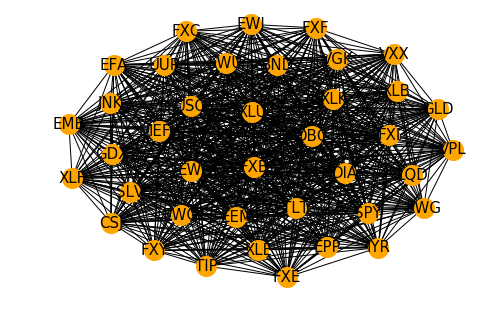

In [6]:
nx.draw(asset_graph, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

The problem with this matrix is that as there is some correlation value between every pair of nodes. Thats why, whatever type of graph we plot, it will not give us any information. In real world, what is interesting are the stocks that are highly correlated only. We need to only concentrate on the connections that are highly correlated. For now, I am considering highly correlated as >90%.

In [7]:
asset_corr_el=asset_corr_el.loc[ (abs(asset_corr_el['value']) > 0.9) & (asset_corr_el['level_0'] != asset_corr_el['level_1']) ].reset_index()
asset_corr_el

index level_0 level_1     value
0        5     BND     EMB  0.912854
1       19     BND     IEF  0.960502
2       20     BND     IYR  0.955606
3       22     BND     LQD  0.971305
4       26     BND     TLT  0.936742
5       31     BND     VXX -0.900317
6       36     BND     XLU  0.941027
7       37     BND     CSJ  0.934951
8       52     DBC     FXC  0.959362
9       53     DBC     FXE  0.934234
10      66     DBC     USO  0.986548
11      83     DIA     EMB  0.917934
12     102     DIA     SPY  0.991233
13     112     DIA     XLF  0.975872
14     113     DIA     XLK  0.988677
15     114     DIA     XLU  0.910599
16     115     DIA     CSJ  0.917660
17     121     EEM     EFA  0.906563
18     123     EEM     EPP  0.968244
19     159     EFA     EEM  0.906563
20     163     EFA     EWG  0.961832
21     166     EFA     EWQ  0.959346
22     185     EFA     VGK  0.975473
23     195     EMB     BND  0.912854
24     197     EMB     DIA  0.917934
25     215     EMB     IYR  0.915085
26     217     EMB     LQD  0.964510
27     219     EMB     SPY  0.935603
28     220     EMB     TIP  0.916770
29     226     EMB     VXX -0.917891
..     ...     ...     ...       ...
100   1269     XLB     JNK  0.920337
101   1278     XLB     VPL  0.930537
102   1328     XLF     DIA  0.975872
103   1350     XLF     SPY  0.963235
104   1361     XLF     XLK  0.951554
105   1367     XLK     DIA  0.988677
106   1370     XLK     EMB  0.939693
107   1389     XLK     SPY  0.991927
108   1396     XLK     VXX -0.914515
109   1399     XLK     XLF  0.951554
110   1401     XLK     XLU  0.931938
111   1402     XLK     CSJ  0.944955
112   1404     XLU     BND  0.941027
113   1406     XLU     DIA  0.910599
114   1409     XLU     EMB  0.947970
115   1424     XLU     IYR  0.949289
116   1426     XLU     LQD  0.957108
117   1428     XLU     SPY  0.927931
118   1439     XLU     XLK  0.931938
119   1441     XLU     CSJ  0.960408
120   1443     CSJ     BND  0.934951
121   1445     CSJ     DIA  0.917660
122   1448     CSJ     EMB  0.968140
123   1455     CSJ     FXB -0.914238
124   1463     CSJ     IYR  0.909633
125   1465     CSJ     LQD  0.952372
126   1467     CSJ     SPY  0.932395
127   1474     CSJ     VXX -0.930061
128   1478     CSJ     XLK  0.944955
129   1479     CSJ     XLU  0.960408

[130 rows x 4 columns]

If a edge is present between two nodes, it means that the two nodes are highly correlated (positive or negative).
The first plot shows the stocks which are correlated with each other

In [8]:
asset_graph = nx.from_pandas_edgelist(asset_corr_el, 'level_0', 'level_1')
for a in asset_corr_el.values:
    asset_graph.add_edge(a[1], a[2] , label= round(a[3],2), weight = abs(round(a[3],2)))
pos = nx.circular_layout(asset_graph)

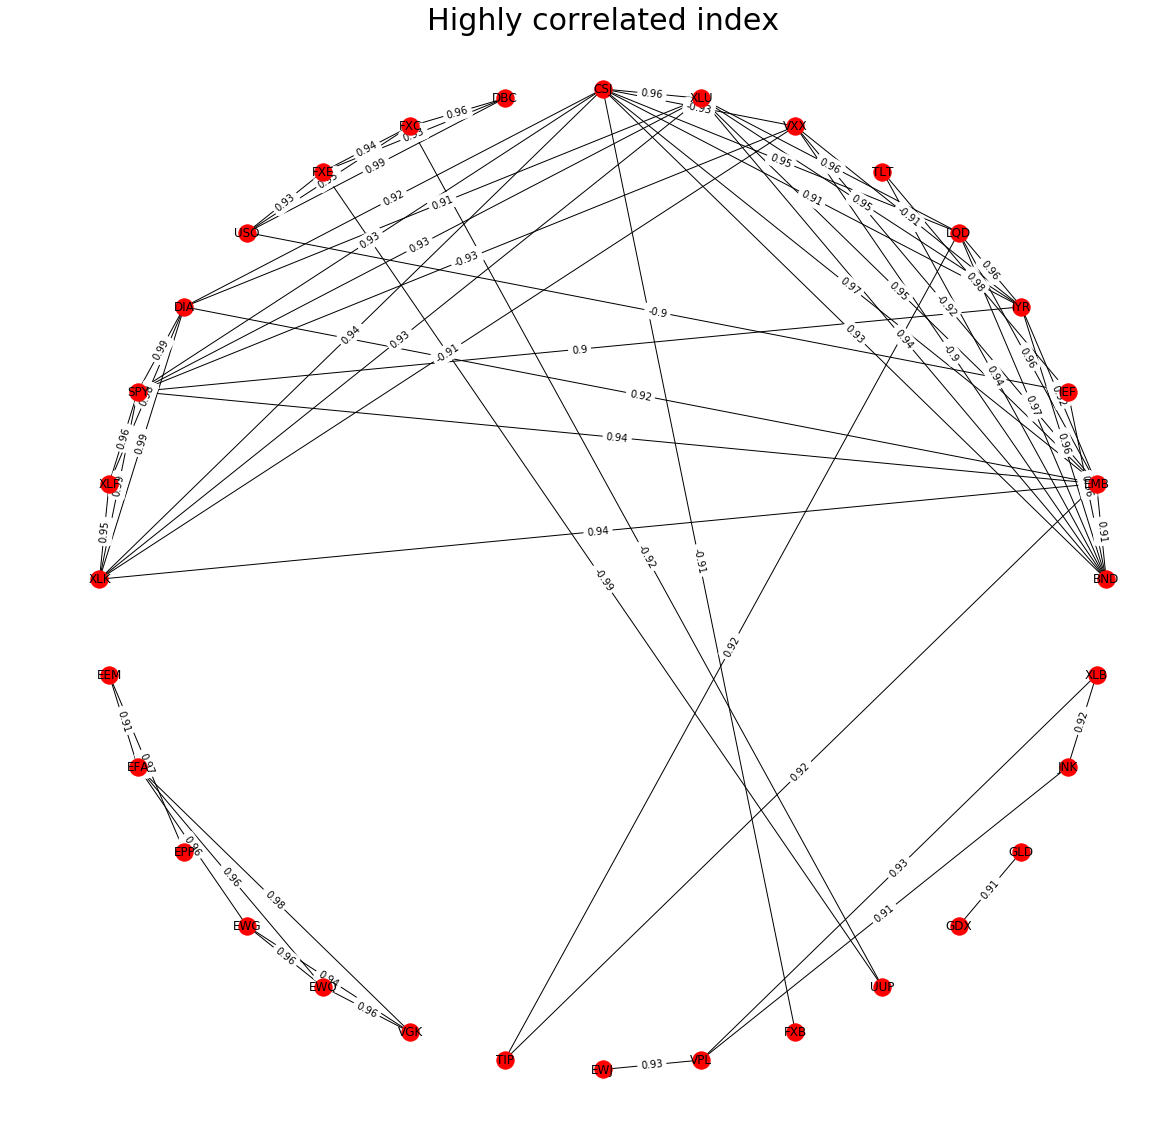

In [9]:
plt.subplots(figsize=(20,20))
plt.title('Highly correlated index', fontsize=30)
nx.draw_networkx_edge_labels(asset_graph, pos, nx.get_edge_attributes(asset_graph,'label'))
nx.draw_circular(asset_graph, with_labels=True)

The below plot shows that for correlation >90%, there are three groups 

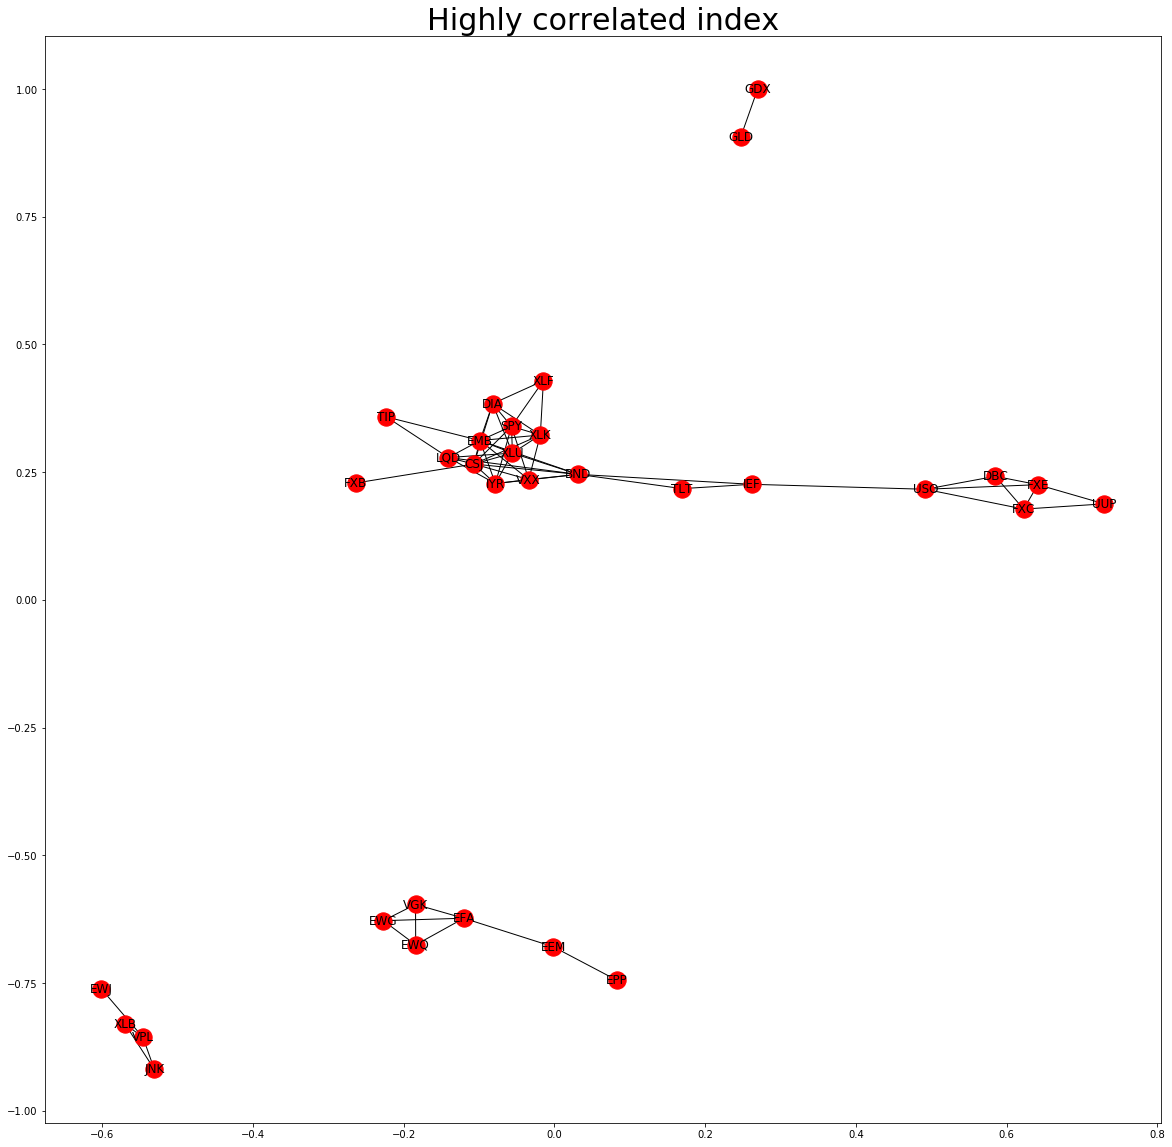

In [10]:
plt.subplots(figsize=(20,20))
plt.title('Highly correlated index', fontsize=30)
nx.draw_networkx(asset_graph, with_labels=True)

In the below plot, we can see the stocks that are highly correlated along with their correlation coefficient.

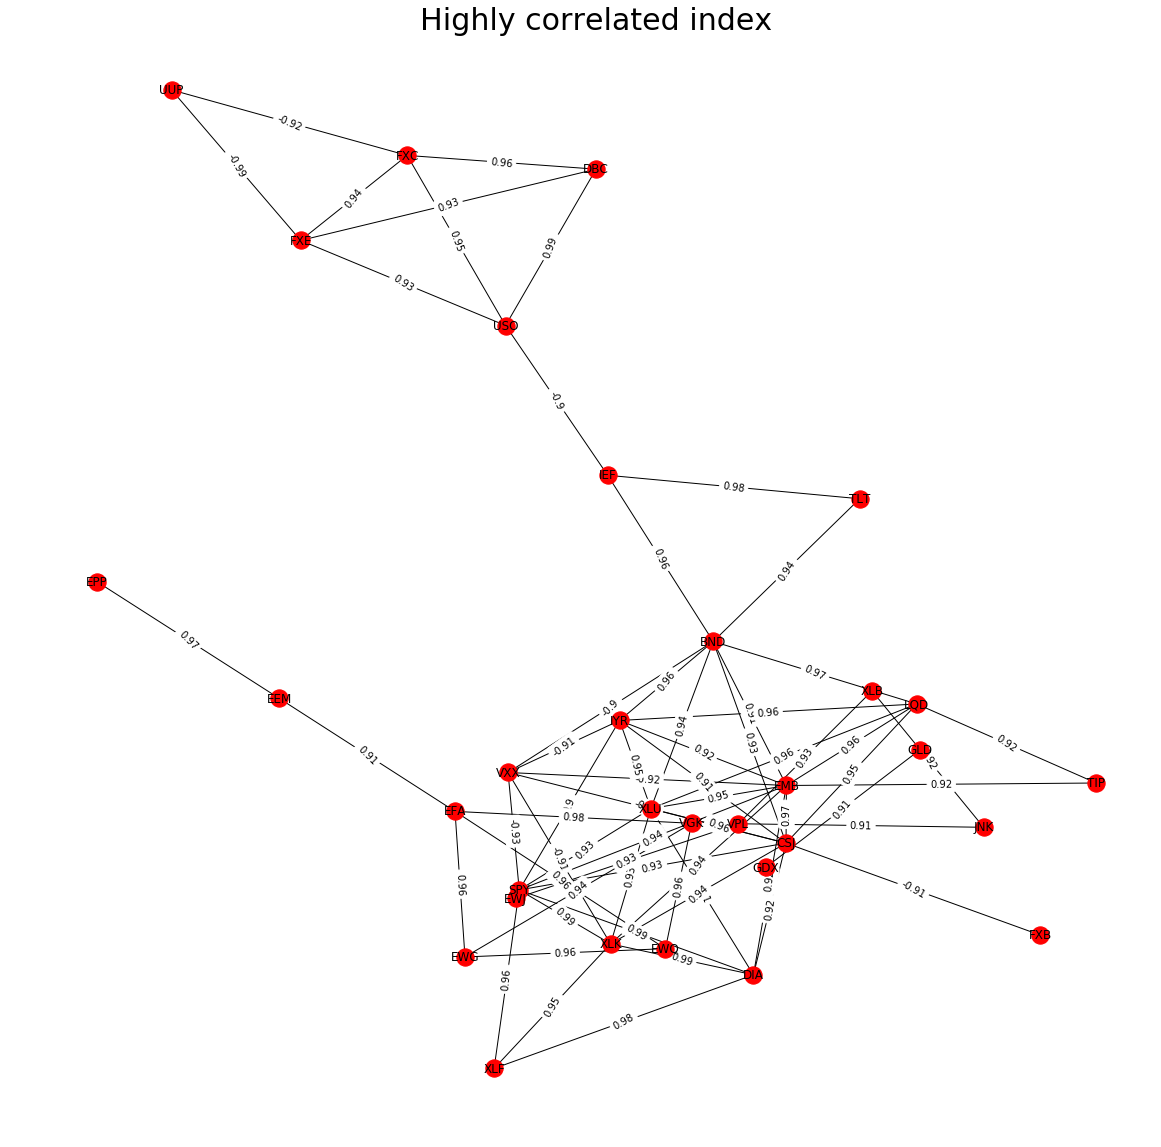

In [11]:
plt.subplots(figsize=(20,20))
plt.title('Highly correlated index', fontsize=30)
pos = nx.kamada_kawai_layout(asset_graph)
nx.draw_networkx_edge_labels(asset_graph, pos, nx.get_edge_attributes(asset_graph,'label'))
nx.draw_kamada_kawai(asset_graph, with_labels=True)

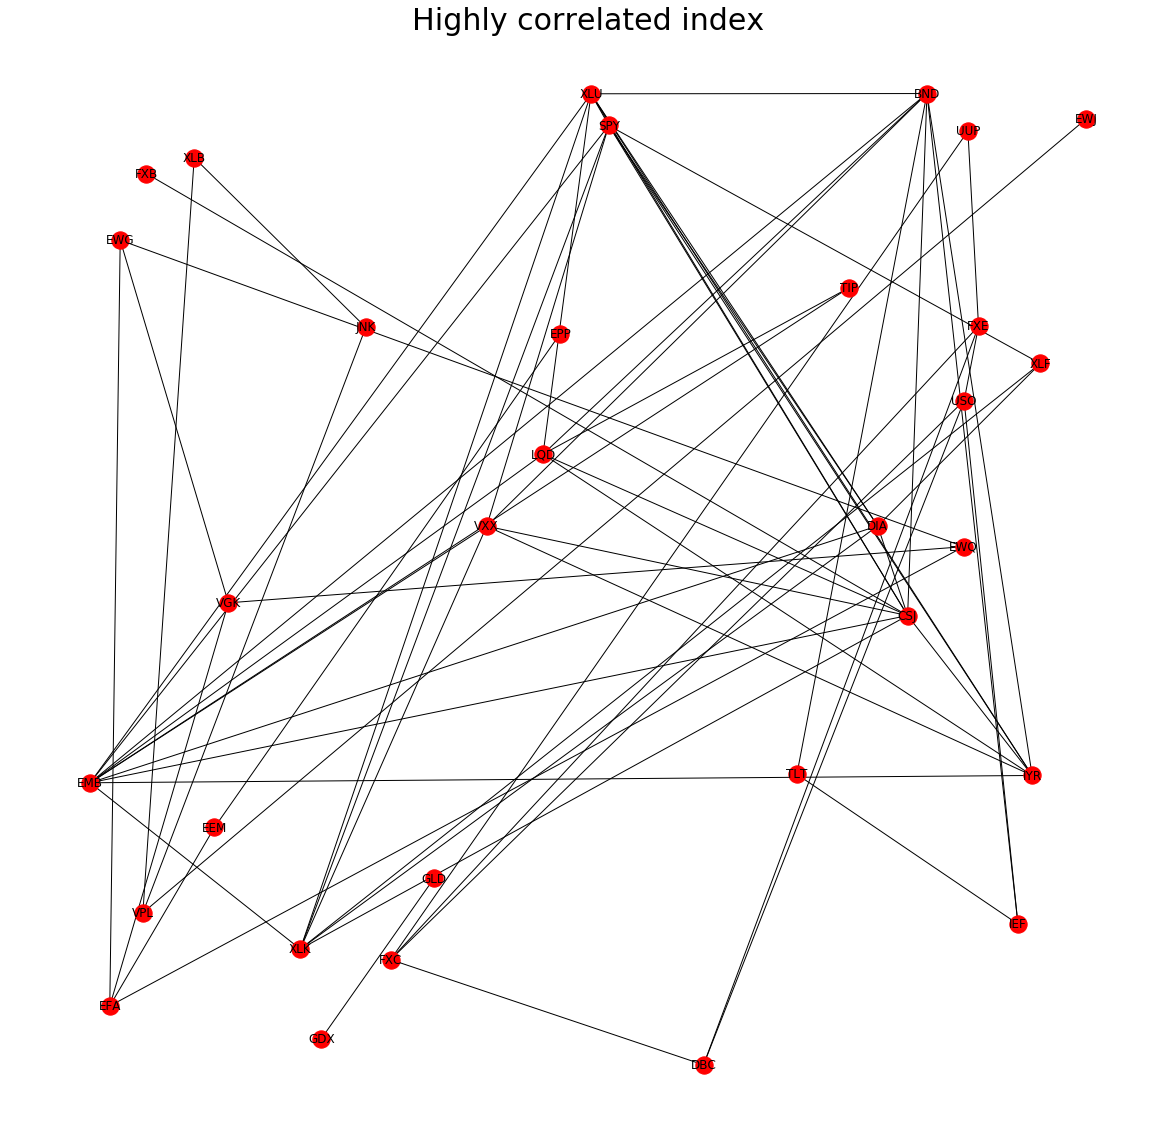

In [12]:
plt.subplots(figsize=(20,20))
plt.title('Highly correlated index', fontsize=30)
nx.draw_random(asset_graph, with_labels=True)

### 2.c
The next step is to increase the thickness of the edges to indicate the level of correlation between the variables. Apart from weights, the edge colors are also used. The red color means that the correlation is negative and the green one means that the correlation is positive. The nodes are also sized based on the number of connections to that node.

In [13]:
color = ['g' if val>0 else 'r' for val in nx.get_edge_attributes(asset_graph,'label').values()]
weight = [(abs(val)-0.9)*100 for val in nx.get_edge_attributes(asset_graph,'label').values()]
degree = dict(asset_graph.degree)

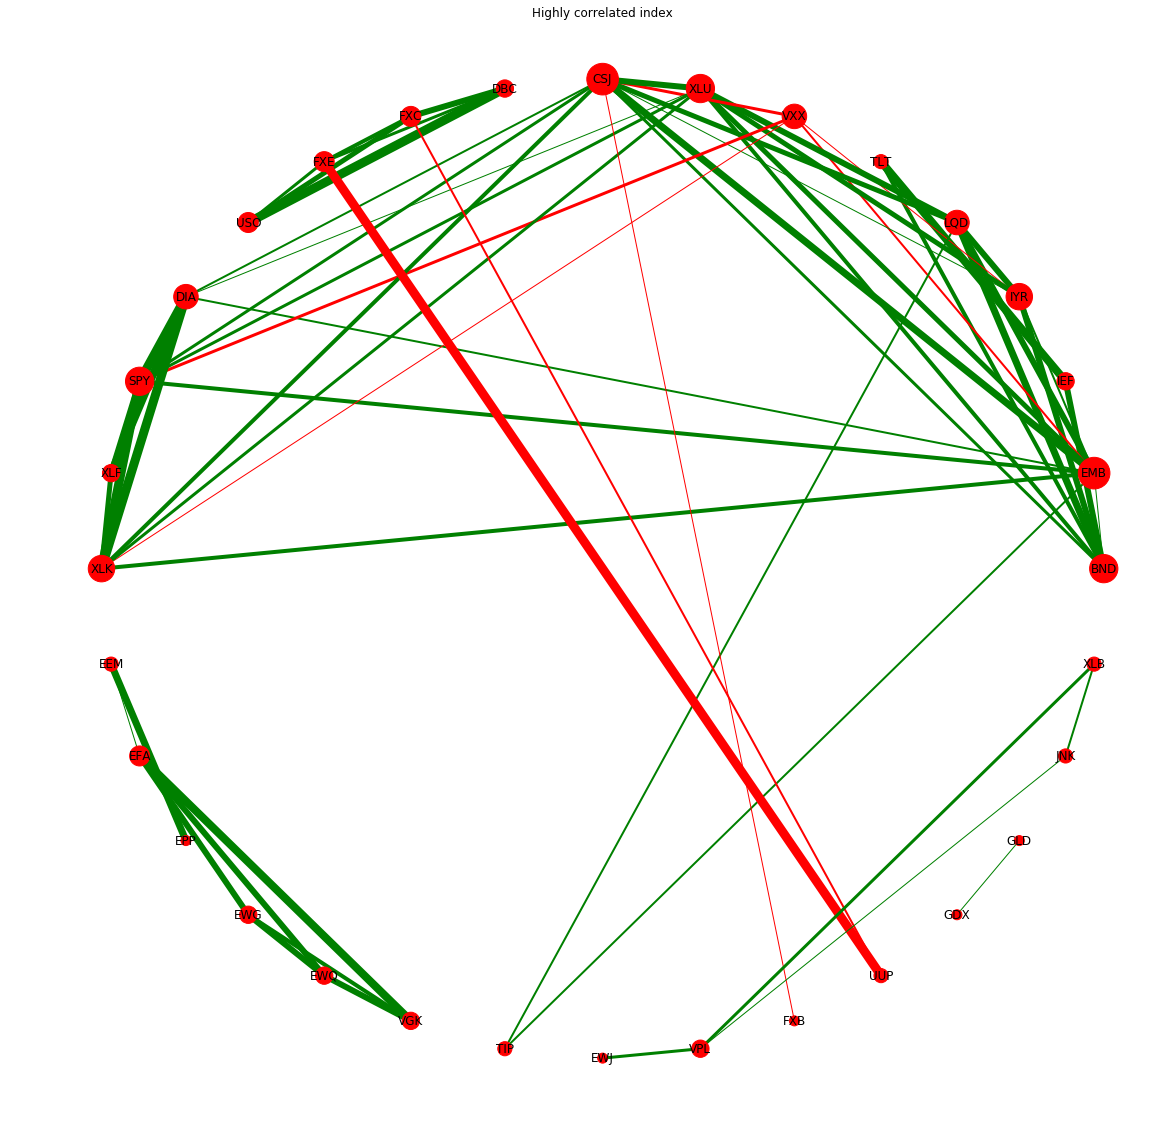

In [14]:
plt.subplots(figsize=(20,20))
plt.title('Highly correlated index')
nx.draw_circular(asset_graph, with_labels=True, edge_color=color, width=weight, node_size=[v * 100 for v in degree.values()])

From the plot we can see the following:
1. What is the type of correlation between the index (positive/negative)
2. The importance of a node (based on the number of connections/number of indeces it is correlated with)
3. The weights of the network
4. Different groups in the network

## Q3 Who talks to whom

We can look at the leaders and opinion makers in a cohort in many ways. First let us load the data.

In [15]:
df_sent = pd.read_excel ('HW2_who_talks_to_whom.xlsx', sheet_name='Sent', index_col = 0, na_values='-')
df_received = pd.read_excel ('HW2_who_talks_to_whom.xlsx', sheet_name='Received', index_col = 0, na_values='-')
df_sent

1     2     3     4     5    6     7     8     9     10  ...    72  \
Nodes                                                            ...         
1      NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   NaN   
2      2.0   NaN   NaN   1.0   3.0  NaN   5.0   NaN   NaN   NaN  ...   NaN   
3      NaN   NaN   NaN   1.0   NaN  2.0   NaN   NaN   7.0   NaN  ...   5.0   
4      NaN   NaN   1.0   NaN   1.0  NaN   NaN   NaN   NaN   1.0  ...   NaN   
5      NaN   3.0   NaN   NaN   NaN  NaN   2.0   NaN   NaN   NaN  ...   NaN   
6      NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   NaN   
7      NaN   3.0   NaN   NaN   1.0  NaN   NaN   NaN   NaN   NaN  ...   NaN   
8      1.0   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   2.0  ...   NaN   
9      NaN   NaN   4.0   2.0   NaN  5.0   NaN   NaN   NaN   NaN  ...   6.0   
10     NaN   NaN   NaN   4.0   NaN  NaN   NaN   NaN   NaN   NaN  ...   NaN   
11     1.0   NaN  10.0   NaN   NaN  2.0   NaN   NaN   NaN   NaN  ...   5.0   
12     NaN   3.0   NaN   NaN  20.0  NaN   6.0   NaN   NaN   NaN  ...   NaN   
13     NaN   NaN   NaN   3.0   NaN  2.0   8.0   3.0   NaN   NaN  ...   NaN   
14     1.0   NaN   NaN   1.0   NaN  1.0   NaN   3.0   NaN   NaN  ...   1.0   
15     NaN   NaN   NaN  15.0   NaN  3.0   NaN   1.0   NaN   NaN  ...   NaN   
16     NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   NaN   
17     2.0   NaN   1.0  15.0   NaN  3.0   NaN   NaN   2.0   NaN  ...   5.0   
18     1.0   NaN   8.0   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   2.0   
19     NaN   4.0   NaN   2.0   4.0  1.0   6.0   2.0   1.0   NaN  ...   NaN   
20     NaN   NaN   NaN  10.0   NaN  NaN   NaN   NaN   NaN   NaN  ...   NaN   
21     NaN   NaN   7.0   NaN   3.0  NaN   NaN   NaN   NaN   NaN  ...   NaN   
22     8.0   NaN   5.0   NaN   NaN  3.0   2.0   NaN   4.0   1.0  ...   7.0   
23     NaN   NaN   NaN   NaN   NaN  NaN   2.0   NaN   NaN   1.0  ...   NaN   
24     NaN   3.0   NaN   NaN   2.0  NaN   NaN   NaN   NaN   NaN  ...   NaN   
25     2.0   3.0   NaN   2.0   NaN  1.0   NaN   NaN   NaN   7.0  ...   NaN   
26     NaN   5.0   1.0   NaN   3.0  NaN   2.0   NaN   NaN   4.0  ...   NaN   
27     2.0  14.0   NaN   1.0   2.0  NaN   5.0   NaN   NaN   2.0  ...   NaN   
28     NaN   NaN   NaN   NaN   NaN  NaN   2.0   NaN   1.0  20.0  ...   NaN   
29     NaN   NaN   NaN   NaN   1.0  NaN   NaN   NaN   NaN   5.0  ...   NaN   
30     NaN   NaN   NaN   NaN   NaN  NaN   1.0   NaN   NaN   2.0  ...   NaN   
...    ...   ...   ...   ...   ...  ...   ...   ...   ...   ...  ...   ...   
52     NaN   NaN   3.0   NaN   NaN  2.0   NaN   NaN   NaN   NaN  ...   NaN   
53     NaN   NaN   NaN   NaN   1.0  NaN   NaN  10.0   NaN   NaN  ...   1.0   
54     NaN   NaN   3.0   5.0   NaN  1.0   NaN   NaN   NaN   NaN  ...   3.0   
55     3.0   NaN   NaN   NaN   3.0  NaN   NaN   NaN   NaN   NaN  ...   NaN   
56     NaN   NaN   NaN   NaN   NaN  2.0   NaN   NaN   NaN   NaN  ...   NaN   
57     NaN   NaN   NaN   NaN   NaN  4.0   NaN   NaN   NaN   NaN  ...   NaN   
58     NaN  12.0   NaN   NaN  10.0  NaN  18.0   5.0   NaN   5.0  ...   NaN   
59     NaN   NaN  32.0   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...  10.0   
60     NaN   NaN   NaN   NaN   NaN  5.0   NaN   NaN   NaN   NaN  ...   NaN   
61     NaN   2.0   NaN   NaN   1.0  NaN   NaN   NaN   6.0   5.0  ...   NaN   
62     NaN   NaN   6.0   2.0   NaN  1.0   NaN   1.0  19.0   NaN  ...   4.0   
63     NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   5.0   NaN  ...  30.0   
64     2.0   NaN   1.0   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   1.0   
65     NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   3.0   
66     NaN   NaN   NaN   1.0   NaN  NaN   NaN   NaN   NaN   NaN  ...   NaN   
67     NaN   NaN   NaN   NaN   NaN  5.0   NaN   NaN   4.0   NaN  ...   2.0   
68     NaN   NaN   NaN   NaN   NaN  NaN   1.0   1.0   NaN   5.0  ...   NaN   
69     NaN   2.0   NaN   NaN  20.0  NaN   4.0   NaN   NaN   NaN  ...   NaN   
70     NaN   NaN   NaN   NaN  

One way is to see which person is the most important while sending emails. If we have any important information to be sent fast, this is the person that we will search for. Considering the people in rows sending mails to people in columns, we can calculate the following:
1. Just by the number of mails sent, who has sent the maximum number of mails
2. By the number of people that a person has a immediate relation with (a relation is defined as sending an email to that person): degree centrality
3. We can also look at the persons who are essential for communication between different closely knit groups. (betweenness centrality)

In [16]:
df_sent_long = df_sent.stack().reset_index()
df_sent_long.columns = ['level_0', 'level_1', 'value']
G_sent = nx.from_pandas_edgelist(df_sent_long, source='level_0', target = 'level_1', create_using=nx.DiGraph())

This graph can be viewed as follows: We can observe two densely connected groups with some points in the edges.

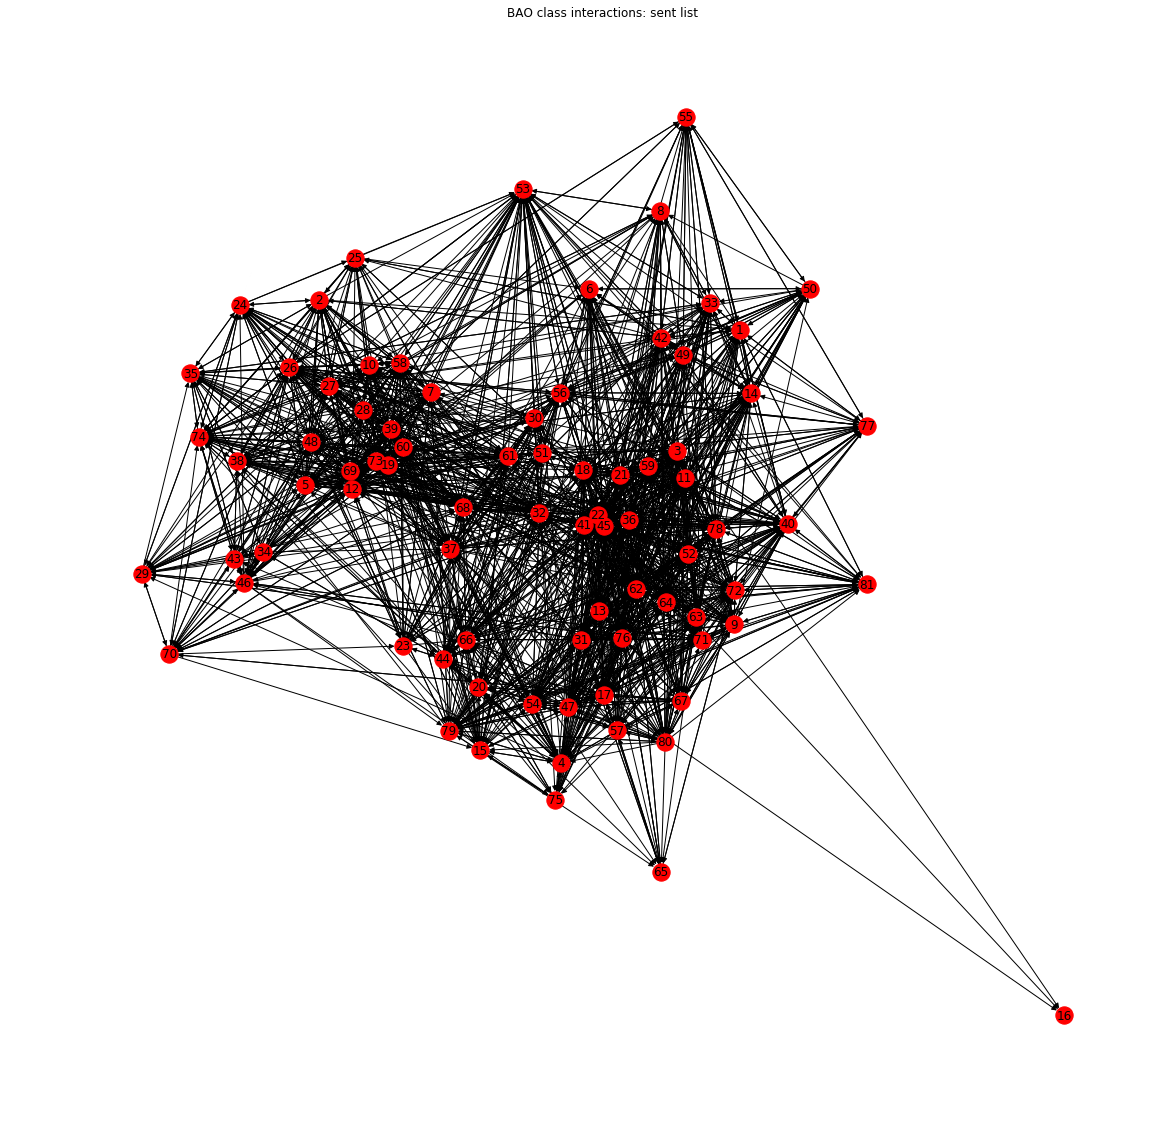

In [17]:
for a in df_sent_long.values:
    G_sent.add_edge(a[0], a[1] , label= a[2], weight = 1/float(a[2]))
plt.subplots(figsize=(20,20))
plt.title('BAO class interactions: sent list')
nx.draw_kamada_kawai(G_sent, with_labels=True)

Students with maximum number of interactions are:

In [18]:
student_sent_mails = list(df_sent.sum(axis=1))
student_sent_mails.index(max(student_sent_mails)) + 1

22

We can say that student 22 is the most important as he/she sent the most number of emails. But to check the student who sent mails to most number of students to the class, we have:

In [19]:
student_sent_mails = list(df_sent.count(axis=1))
print(student_sent_mails.index(max(student_sent_mails)) + 1)
student_sent_mails[21]

22


49

It is the same student 22. From the above, student 22 should also be the student with the maximum degree centrality. The degree centralities of different students are:

In [20]:
degree_centrality = nx.algorithms.centrality.degree_centrality(G_sent)
degree_centrality

{1: 0.5625,
 13: 0.7625000000000001,
 14: 0.7125,
 18: 0.7375,
 22: 1.0875000000000001,
 25: 0.36250000000000004,
 33: 0.6000000000000001,
 36: 0.8500000000000001,
 40: 0.875,
 41: 0.7625000000000001,
 42: 0.7000000000000001,
 47: 0.9375,
 49: 0.6375000000000001,
 50: 0.48750000000000004,
 52: 0.6625000000000001,
 55: 0.3875,
 57: 0.4375,
 64: 0.7125,
 75: 0.36250000000000004,
 77: 0.47500000000000003,
 78: 0.9625,
 79: 0.7125,
 80: 0.75,
 81: 0.5,
 2: 0.6000000000000001,
 4: 0.8250000000000001,
 5: 0.5875,
 7: 0.525,
 12: 0.8250000000000001,
 19: 0.6625000000000001,
 24: 0.5,
 26: 0.8250000000000001,
 27: 0.6375000000000001,
 28: 0.47500000000000003,
 29: 0.4,
 32: 1.05,
 35: 0.4375,
 37: 0.8125,
 38: 0.55,
 39: 0.5750000000000001,
 46: 0.65,
 48: 0.7250000000000001,
 53: 0.8250000000000001,
 58: 0.6000000000000001,
 60: 0.4625,
 61: 0.625,
 68: 0.8875000000000001,
 69: 0.7125,
 73: 0.8625,
 74: 0.625,
 3: 0.75,
 6: 0.45,
 9: 0.65,
 11: 0.9125000000000001,
 16: 0.037500000000000006,
 

Although student 22 has sent mails to the maximum number of people, he has still sent mails to only 49 out of the 81 students. This means if we want to send a mail to the whole class, that there might be other important people thru whome the remaining people receive mails. We should identify people who are part of different closely knit groups and who are essential for passing information between groups. This is given by betweenness centrality. The most important people according to this metric in descending order are:

In [21]:
btw_centrality = nx.algorithms.centrality.betweenness_centrality(G_sent)
sorted(btw_centrality.items(), key = lambda item:item[1], reverse = True)

[(32, 0.03433973408257049),
 (22, 0.030032892616945334),
 (62, 0.02385758888493979),
 (26, 0.02198653211699741),
 (78, 0.02097722698075968),
 (4, 0.020269865147677223),
 (53, 0.018576105868286636),
 (73, 0.018221984061413395),
 (17, 0.01790031713004774),
 (68, 0.017382904976828678),
 (37, 0.01645066266673952),
 (76, 0.016318965371603104),
 (31, 0.01630113902708804),
 (47, 0.015899735016639882),
 (12, 0.015242888920348164),
 (36, 0.014655021541959008),
 (11, 0.014511998066709086),
 (44, 0.01410371098583232),
 (21, 0.012764615931720359),
 (40, 0.012691737661699233),
 (46, 0.01258302795760665),
 (14, 0.012428686509324948),
 (79, 0.01235161212521247),
 (66, 0.011726156126903154),
 (56, 0.011593838362154092),
 (80, 0.011232719026172252),
 (48, 0.010910086668151577),
 (19, 0.009226120424339594),
 (3, 0.009185175983011289),
 (61, 0.009181429748329337),
 (49, 0.00885570089186874),
 (69, 0.008811207794833105),
 (33, 0.008718286878526202),
 (18, 0.00862430571385725),
 (42, 0.008579288618001078),

Another way to look at a network is to look at the clustering coefficient. The clustering coefficient is a way of measuring the degree to which the nodes in a graph cluster together. Networks with high number of clustering coefficient are more social. The average clustering coefficient for the graph is (assuming a undirected graph):

In [22]:
df_sent_long = df_sent.stack().reset_index()
df_sent_long.columns = ['level_0', 'level_1', 'value']
G_sent = nx.from_pandas_edgelist(df_sent_long, 'level_0', 'level_1')
nx.algorithms.cluster.average_clustering(G_sent)

0.6049933207008228

The cluster average for the cluster is 60%.  
Another way is to look at an important person in the group is by who receives the maximum emails. If we have to get a feedback about the course/materials, this will be the person to contact. Considering the people in rows receiving mails from people in columns, we can calculate the following:
1. Just by the number of mails received, who has received the maximum number of mails
2. By the number of people that know this student directly (a relation is defined as receiving an email to that person): degree centrality
3. We can also look at the persons who are essential for communication between different closely knit groups. (betweenness centrality)

In [23]:
df_received_long = df_received.stack().reset_index()
df_received_long.columns = ['level_0', 'level_1', 'value']
G_received = nx.from_pandas_edgelist(df_received_long, source='level_0', target = 'level_1', create_using=nx.DiGraph())

student_received_mails = list(df_received.sum(axis=1))
print('The student who received the maximum number of mails is ', student_received_mails.index(max(student_received_mails)) + 1)

student_rec_mails = list(df_received.count(axis=1))
print('The student who sent the maximum number of students mails is ', student_rec_mails.index(max(student_rec_mails)) + 1)
print('The number of students that student 21 has sent mails to', student_rec_mails[21])

print('The degree centrality of the nodes(students)')
print(nx.algorithms.centrality.degree_centrality(G_received))

print('The betweenness centrality for the nodes(in order of importance)')
btw_centrality = nx.algorithms.centrality.betweenness_centrality(G_received)
sorted(btw_centrality.items(), key = lambda item:item[1], reverse = True)

The student who received the maximum number of mails is  22
The student who sent the maximum number of students mails is  22
The number of students that student 21 has sent mails to 49
The degree centrality of the nodes(students)
{1: 0.5625, 13: 0.7375, 14: 0.7000000000000001, 18: 0.7375, 22: 1.0875000000000001, 25: 0.36250000000000004, 33: 0.5875, 36: 0.8500000000000001, 40: 0.8875000000000001, 41: 0.7625000000000001, 42: 0.6875, 47: 0.9375, 49: 0.6125, 50: 0.48750000000000004, 52: 0.65, 55: 0.3875, 57: 0.45, 64: 0.7000000000000001, 75: 0.35000000000000003, 77: 0.47500000000000003, 78: 0.8375, 79: 0.6875, 80: 0.7375, 81: 0.41250000000000003, 2: 0.5875, 4: 0.7875000000000001, 5: 0.5625, 7: 0.5125000000000001, 12: 0.8125, 19: 0.65, 24: 0.48750000000000004, 26: 0.8125, 27: 0.6125, 28: 0.4625, 29: 0.3875, 32: 1.0, 35: 0.4, 37: 0.8, 38: 0.5125000000000001, 39: 0.5625, 46: 0.625, 48: 0.375, 53: 0.8375, 58: 0.5875, 60: 0.45, 61: 0.625, 68: 0.875, 69: 0.7000000000000001, 73: 0.8375, 74: 0.575

[(32, 0.033685317252403014),
 (22, 0.03268675439175199),
 (62, 0.025287214131329633),
 (26, 0.023583982259878348),
 (53, 0.021120359509230077),
 (4, 0.020136305376281232),
 (68, 0.018907459112556913),
 (17, 0.018752932239117087),
 (37, 0.018208813856915494),
 (73, 0.017806476211176692),
 (47, 0.017562120468855576),
 (76, 0.01700807271346677),
 (12, 0.016843150930065845),
 (31, 0.016242484062669656),
 (11, 0.015780281233151647),
 (56, 0.015747674766214706),
 (36, 0.014960907271751107),
 (40, 0.014357044788440824),
 (21, 0.014124920491376184),
 (78, 0.013536437774405415),
 (66, 0.013110345276755513),
 (14, 0.01288366614283614),
 (79, 0.012779638926174718),
 (46, 0.012632795051620566),
 (80, 0.011445126006314978),
 (44, 0.010601819264942636),
 (61, 0.009866470483665724),
 (19, 0.009527467767857095),
 (33, 0.009402347080777754),
 (18, 0.008901659947036724),
 (42, 0.00855375784736947),
 (3, 0.008424303697765761),
 (69, 0.008162262487254187),
 (41, 0.008052097219697093),
 (45, 0.007946848481

To have a holistic picture of the person who has the maximum influence, we should look at combining both the sent and recieved mails and then look at the relationships between students.

In [24]:
df_long = df_sent_long.append(df_received_long, ignore_index=True)
df_long.sample(5)

level_0  level_1  value
173         8       21    1.0
567        23       14    1.0
1938       78       18    3.0
784        32       11    1.0
1748       70       68    1.0

Below is a plot of all the conversations that happened in the cohort.

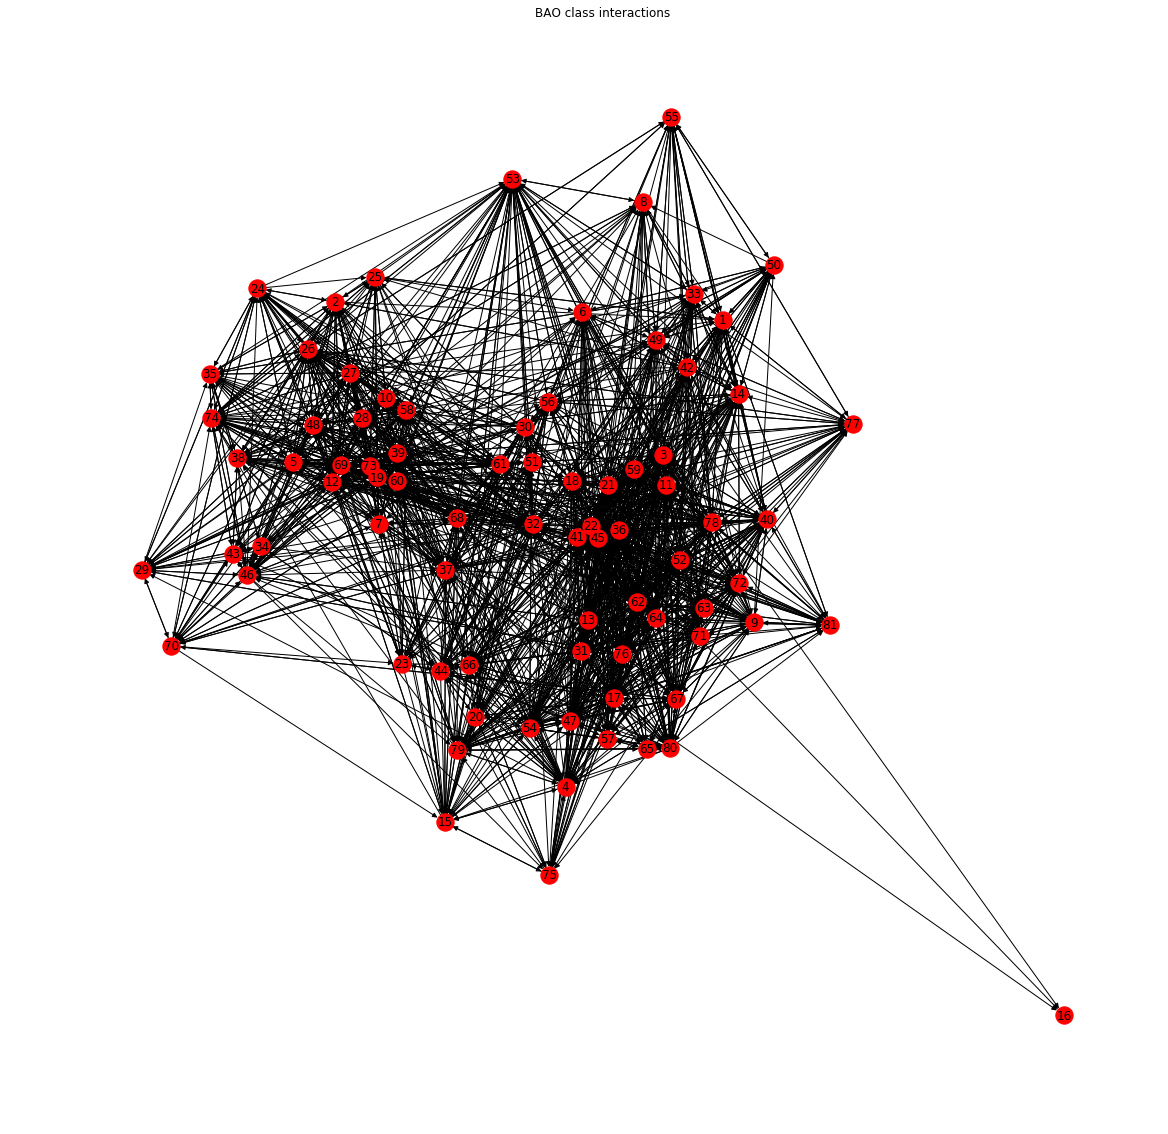

In [25]:
G = nx.from_pandas_edgelist(df_long, 'level_0', 'level_1', create_using=nx.DiGraph())
for a in df_long.values:
    G.add_edge(a[0], a[1] , label= a[2], weight = 1/float(a[2]))
plt.subplots(figsize=(20,20))
plt.title('BAO class interactions')
nx.draw_kamada_kawai(G, with_labels=True)

One way to measure how the importance of a student is to identify the student who has the maximum number of connections(connections defined by an email). This is called as degree centrality. Below is the list of students in order of importance according to degree centrality.

In [26]:
degree_centrality = nx.algorithms.centrality.degree_centrality(G)
sorted(degree_centrality.items(), key = lambda item:item[1], reverse = True)

[(22, 1.0875000000000001),
 (32, 1.05),
 (62, 1.0125),
 (78, 0.9625),
 (47, 0.9375),
 (31, 0.925),
 (11, 0.9125000000000001),
 (68, 0.9),
 (40, 0.8875000000000001),
 (17, 0.8875000000000001),
 (76, 0.875),
 (73, 0.8625),
 (36, 0.8500000000000001),
 (12, 0.8375),
 (53, 0.8375),
 (4, 0.8250000000000001),
 (26, 0.8250000000000001),
 (37, 0.8250000000000001),
 (13, 0.7625000000000001),
 (41, 0.7625000000000001),
 (21, 0.7625000000000001),
 (80, 0.75),
 (3, 0.75),
 (45, 0.75),
 (18, 0.7375),
 (66, 0.7375),
 (48, 0.7250000000000001),
 (69, 0.7250000000000001),
 (54, 0.7250000000000001),
 (14, 0.7125),
 (64, 0.7125),
 (79, 0.7125),
 (42, 0.7000000000000001),
 (52, 0.6625000000000001),
 (19, 0.6625000000000001),
 (56, 0.6625000000000001),
 (67, 0.6625000000000001),
 (46, 0.65),
 (9, 0.65),
 (72, 0.65),
 (49, 0.6375000000000001),
 (27, 0.6375000000000001),
 (61, 0.6375000000000001),
 (74, 0.6375000000000001),
 (44, 0.6375000000000001),
 (33, 0.6000000000000001),
 (2, 0.6000000000000001),
 (58, 

22, 32 and 62 seems to be the most important people. Another way is to identify the students who connect multiple closely knit groups. These people are essential for communication, and stutting down of one such node can shut down information to a group. These people are identified by betweenness centrality. Below is the list of students in order of importance according to betweenness centrality. The most important people seem to be student number 32, 22 and 62.

In [27]:
btw_centrality = nx.algorithms.centrality.betweenness_centrality(G)
sorted(btw_centrality.items(), key = lambda item:item[1], reverse = True)

[(32, 0.03367803055060479),
 (22, 0.029676782740302308),
 (62, 0.024618405263487624),
 (26, 0.021870067777523913),
 (4, 0.019760606155448585),
 (78, 0.01975835372945244),
 (53, 0.018937340628483),
 (73, 0.01780295119318249),
 (68, 0.017774400505559826),
 (17, 0.01767723800860176),
 (37, 0.01673484989290058),
 (76, 0.016179656811845657),
 (31, 0.016113669739356767),
 (47, 0.015735510155342275),
 (12, 0.015323290598885682),
 (44, 0.014724108418634143),
 (11, 0.014344329760204876),
 (36, 0.014320313935122108),
 (56, 0.01422480654854153),
 (21, 0.013075443510263117),
 (40, 0.012867723190818355),
 (46, 0.012436779482468081),
 (14, 0.01235103667970006),
 (79, 0.01226804127847954),
 (66, 0.01153554712912731),
 (80, 0.011156688492875341),
 (48, 0.010953364227808668),
 (61, 0.009298045543209186),
 (19, 0.009121504286591146),
 (69, 0.009067265988733829),
 (38, 0.0090660950685006),
 (3, 0.009036270471120187),
 (33, 0.00857334660203843),
 (18, 0.008566843874468343),
 (42, 0.00848856676644143),
 (1

Another way to identify the important people in a network is to not only look at the number of people who are connected to the person but also the importance of the people whom they are connected to. The importance of the person can be defined as proportional to the sum of importance of the immediate people connected to him/her. This is defined by eigenvector centrality. Below is the list of students in order of importance according to eigenvector centrality. The most important people seem to be student number 78, 14 and 31.

In [29]:
ev_centrality = nx.algorithms.centrality.eigenvector_centrality(G)
sorted(ev_centrality.items(), key = lambda item:item[1], reverse = True)

[(22, 0.1768356888874336),
 (78, 0.17659690256216223),
 (40, 0.1739667221959645),
 (31, 0.17296827938158996),
 (62, 0.17264916621023957),
 (14, 0.17144235986165987),
 (11, 0.17136207378837548),
 (45, 0.16695273749975828),
 (76, 0.16115285170754784),
 (21, 0.15945725041531544),
 (18, 0.1541241453533198),
 (47, 0.15292714253579032),
 (17, 0.1527301110032992),
 (52, 0.14633567340921583),
 (67, 0.14567724003682503),
 (41, 0.1426506198041389),
 (64, 0.1409028915249925),
 (6, 0.1406726351966102),
 (79, 0.14043754826171798),
 (53, 0.14029300899716265),
 (3, 0.1386334116845408),
 (32, 0.13712372196095826),
 (72, 0.13659970351331654),
 (36, 0.1364881207154669),
 (66, 0.1356552104526729),
 (54, 0.13365054421329534),
 (4, 0.1311034223538073),
 (13, 0.13029328421080338),
 (33, 0.12788633169721844),
 (63, 0.1272842106884873),
 (59, 0.1266834888307158),
 (37, 0.11799881728641398),
 (81, 0.11517462239027253),
 (80, 0.11332794381871114),
 (56, 0.11201098961057723),
 (49, 0.11197989415401688),
 (12, 0.

These node centrality measures can be viewed as the size of the nodes in the above plot. In the below plots, the weights of the edges are proportional to the number of emails sent.

In [30]:
weight = [ val*0.1 for val in nx.get_edge_attributes(G,'label').values()]
node_size = list(np.array(list(ev_centrality))*10)

In [31]:
import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=min(weight), vmax=max(weight))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)

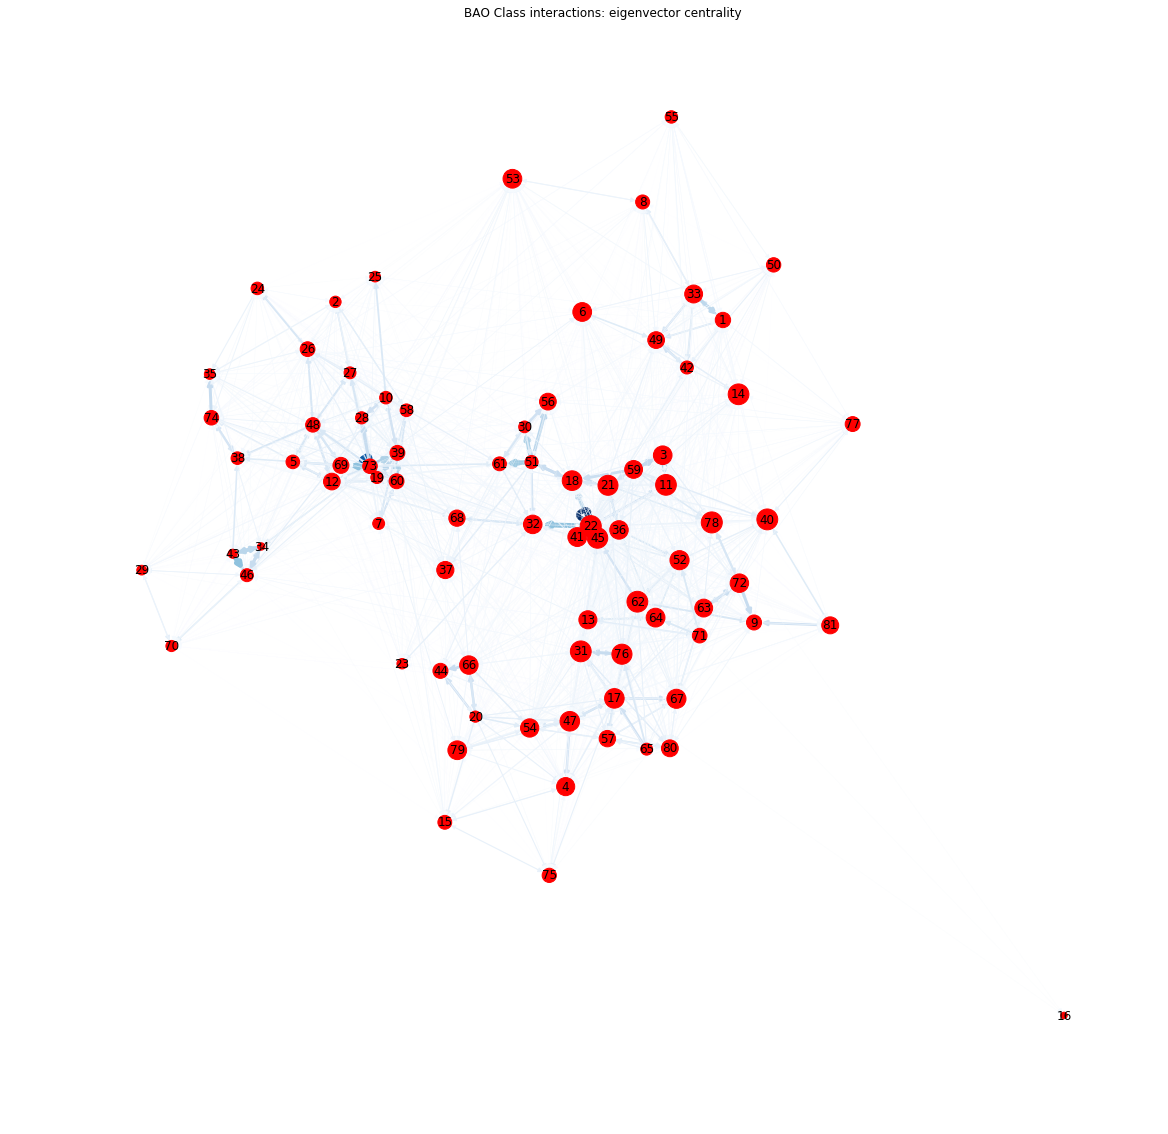

In [32]:
plt.subplots(figsize=(20,20))
plt.title('BAO Class interactions: eigenvector centrality')
nx.draw_kamada_kawai(G, with_labels=True, edge_color=cmap.to_rgba(weight), width=weight, node_size=list(np.array(list(ev_centrality.values()))*2500))

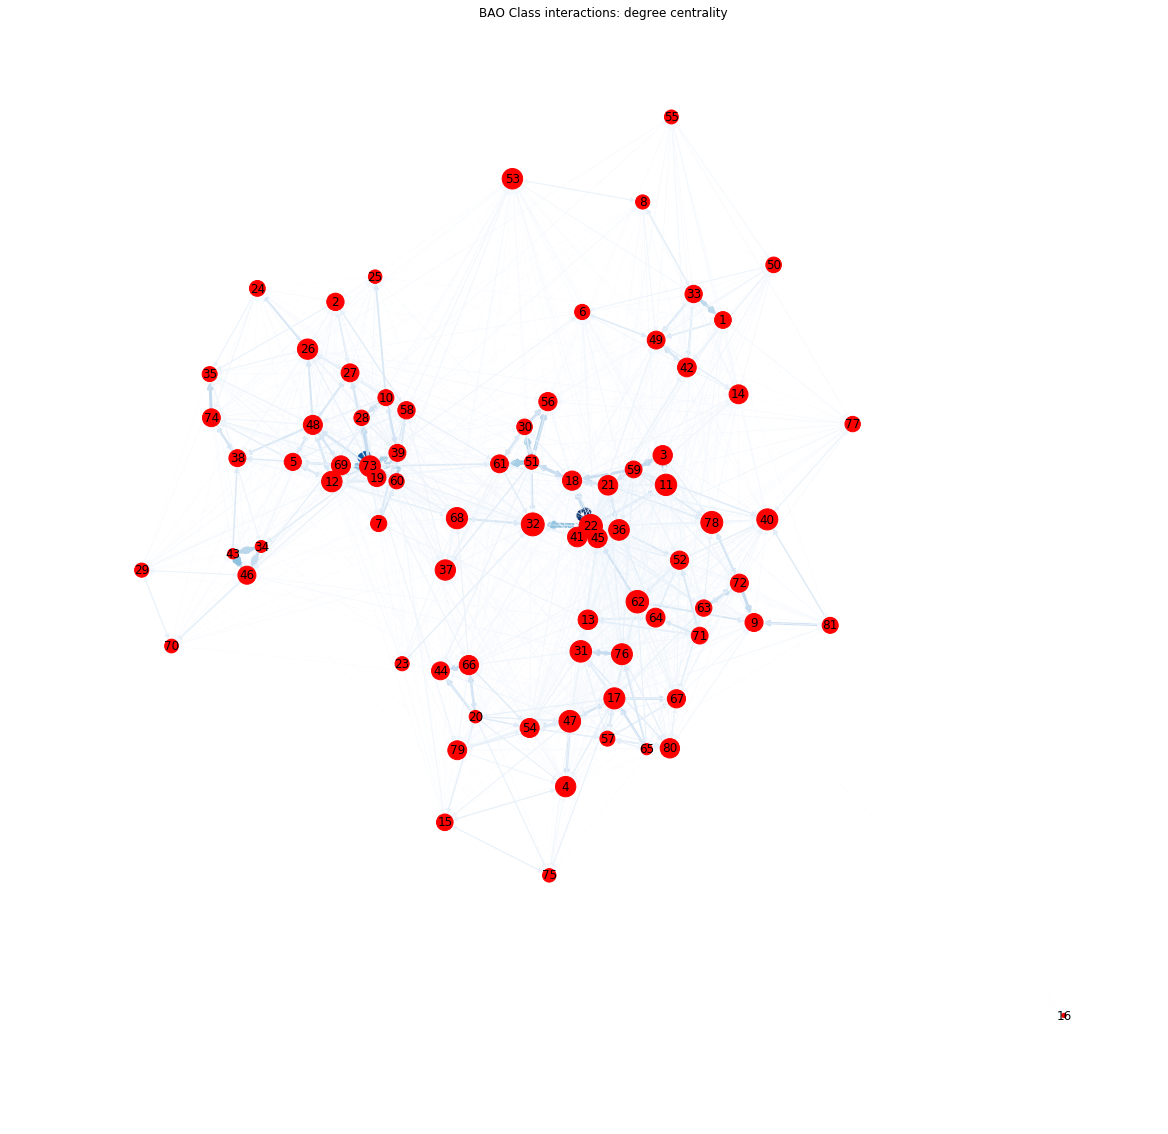

In [33]:
plt.subplots(figsize=(20,20))
plt.title('BAO Class interactions: degree centrality')
nx.draw_kamada_kawai(G, with_labels=True, edge_color=cmap.to_rgba(weight), width=weight,  node_size=list(np.array(list(degree_centrality.values()))*500))

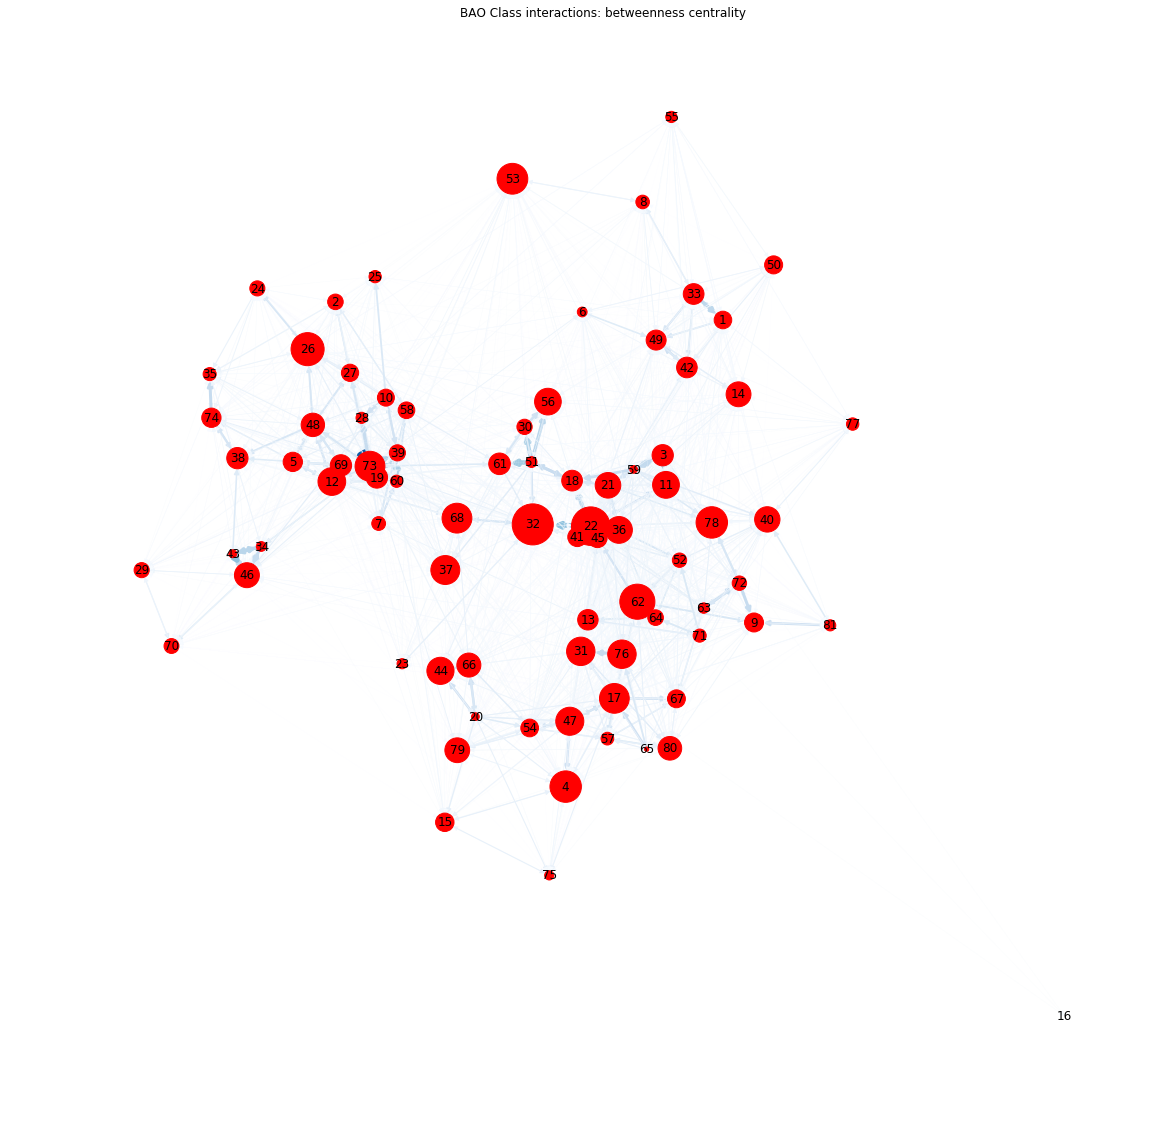

In [34]:
plt.subplots(figsize=(20,20))
plt.title('BAO Class interactions: betweenness centrality')
nx.draw_kamada_kawai(G, with_labels=True, edge_color=cmap.to_rgba(weight), width=weight, node_size=list(np.array(list(btw_centrality.values()))*5*10**4))

From the above analysis, we can find the most important students in the batch. The most students who has the most connections, the students who are part of multiple groups and are important to send message across and the students who are important based on whom they know immediately. This provides a holistic picture of the batch and the students in the batch.